In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#importing the dataset
df = pd.read_csv("/kaggle/input/insurance/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data sanity checks

In [4]:
df.shape

(1338, 7)

In [5]:
df.duplicated().sum()

1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### Data Cleaning

In [9]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [10]:
num = df.select_dtypes(include = "number")
num

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [11]:
corel = num.corr()
corel

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


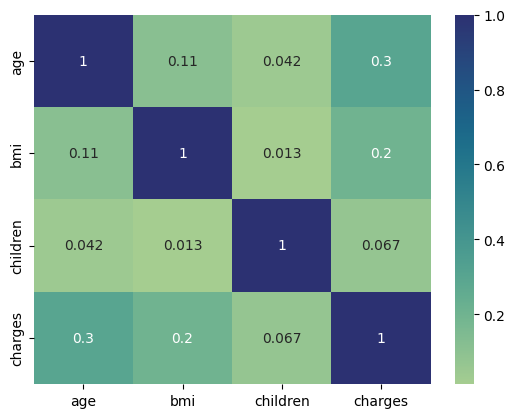

In [12]:
sns.heatmap(corel, cmap = 'crest', annot = True)
plt.show()

### Encoding categorical variables

In [13]:
df.describe(include = "object").T


,count,unique,top,freq
sex,1337,2,male,675
smoker,1337,2,no,1063
region,1337,4,southeast,364


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
#encoding
le = LabelEncoder()
df['sex']= le.fit_transform(df['sex'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [16]:
df['smoker'] = le.fit_transform(df['smoker'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [17]:
dfm = pd.get_dummies(df['region'], drop_first = True, prefix = 'region').astype(int)
dfm

,region_northwest,region_southeast,region_southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [18]:
region = df[df['region'] == 'northeast']
region

,age,sex,bmi,children,smoker,region,charges
8,37,1,29.830,2,0,northeast,6406.41070
10,25,1,26.220,0,0,northeast,2721.32080
16,52,0,30.780,1,0,northeast,10797.33620
17,23,1,23.845,0,0,northeast,2395.17155
20,60,0,36.005,0,0,northeast,13228.84695
...,...,...,...,...,...,...,...
1321,62,1,26.695,0,1,northeast,28101.33305
1325,61,1,33.535,0,0,northeast,13143.33665
1326,42,0,32.870,0,0,northeast,7050.02130
1328,23,0,24.225,2,0,northeast,22395.74424


In [19]:
dfm.head(9)

,region_northwest,region_southeast,region_southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
5,0,1,0
6,0,1,0
7,1,0,0
8,0,0,0


In [20]:
df.drop(['region'], axis = 1, inplace = True)
df1 = pd.concat([df, dfm], axis = 1)
df1

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,1,0,0
1334,18,0,31.920,0,0,2205.98080,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,1


In [21]:
#defining the dependent and independent variables
X = df.drop(['charges'], axis = 1)
y = df['charges']
X.head()

,age,sex,bmi,children,smoker
0,19,0,27.900,0,1
1,18,1,33.770,1,0
2,28,1,33.000,3,0
3,33,1,22.705,0,0
4,32,1,28.880,0,0


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
#splitting the data
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


In [24]:
print("shape of X_train: ",X_train.shape)
print('*'* 50)
print("shape of X_test: ",X_test.shape)
print('*'* 50)
print("shape of y_train: ",y_train.shape)
print('*'* 50)
print("shape of y_test: ",y_test.shape)
print('*'* 50)

shape of X_train:  (1069, 5)
**************************************************
shape of X_test:  (268, 5)
**************************************************
shape of y_train:  (1069,)
**************************************************
shape of y_test:  (268,)
**************************************************


In [25]:
#scaling the data
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

In [27]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)
X_train_scaled.head()

,age,sex,bmi,children,smoker
0,1.489407,0.962354,0.414116,1.585550,-0.532272
1,1.489407,-1.039118,-1.096822,-0.920541,-0.532272
2,0.631515,-1.039118,-0.543228,-0.085177,-0.532272
3,-1.441724,0.962354,0.712141,-0.920541,1.878739
4,-1.441724,-1.039118,-0.290156,-0.920541,1.878739


In [28]:
#modelling the data

from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
preds = lr.predict(X_test)
preds

array([ 3.58925745e+04,  1.24847598e+04,  1.33634104e+04,  1.21020078e+04,
        1.15448692e+04,  1.81260361e+03,  5.15249134e+03,  1.19427633e+04,
        9.94720408e+03,  3.38212638e+04,  1.12117831e+04,  5.50774772e+03,
        1.04850932e+04,  8.72768547e+03,  3.49778372e+03,  1.32178261e+04,
        3.08457913e+03,  3.20863239e+04,  1.64932024e+04,  1.65162479e+04,
        5.90085925e+03,  1.85681193e+04,  8.77781942e+03,  1.04094273e+04,
        6.62642075e+03,  3.59426039e+04,  9.07015809e+03,  3.95289803e+04,
        5.77471796e+03,  3.31670859e+03,  1.61399311e+04,  4.50765740e+03,
        4.83772459e+03,  1.06272884e+04,  2.88534872e+03,  4.90481150e+03,
        3.04468603e+04,  1.16697700e+04,  1.27762217e+04,  1.05290876e+04,
        3.39657928e+04,  5.19029951e+01,  1.15542499e+04,  3.37342103e+04,
        1.78388035e+04,  1.21833552e+04,  1.49309094e+04,  3.32836416e+03,
        6.53205305e+03,  9.62624722e+03,  1.35255122e+04,  1.29520639e+04,
        1.13718986e+04,  

In [31]:
res =mean_squared_error(y_test,preds)
res

32143654.866868075

In [32]:
res_r =mean_squared_error(y_test,preds)
res_r

32143654.866868075

In [33]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

DecisionTreeRegressor()

In [34]:
pred_tree = dtree.predict(X_test)
pred_tree


array([48885.13561, 11743.9341 , 10807.4863 ,  5649.715  ,  5699.8375 ,
        2974.126  ,  1917.3184 , 25517.11363, 12029.2867 , 24667.419  ,
       13012.20865,  4005.4225 ,  9487.6442 ,  9500.57305,  1137.011  ,
       13457.9608 ,  4992.3764 , 37607.5277 , 20462.99766, 15170.069  ,
        3761.292  , 13470.86   , 17929.30337,  7731.4271 ,  4433.3877 ,
       44202.6536 ,  8410.04685, 48517.56315,  5002.7827 ,  2483.736  ,
       10977.2063 ,  3554.203  ,  5312.16985, 30284.64294,  1621.8827 ,
        1980.07   , 36197.699  , 13415.0381 , 24915.04626, 15828.82173,
       24667.419  ,  1837.237  , 11085.5868 , 40720.55105, 13405.3903 ,
       12146.971  , 10381.4787 ,  5266.3656 ,  9264.797  , 11345.519  ,
       13429.0354 , 11881.9696 , 10796.35025,  6334.34355,  9249.4952 ,
        2352.96845, 13126.67745, 11848.141  ,  5257.50795, 14313.8463 ,
       10461.9794 , 24227.33724, 16586.49771,  5312.16985,  3956.07145,
       26018.95052,  2138.0707 , 41661.602  ,  9625.92   , 28923

In [35]:
rr_tree = r2_score(y_test, pred_tree)
rr_tree

0.6591227495041863

In [36]:
rfor = RandomForestRegressor()
rfor.fit(X_train, y_train)

RandomForestRegressor()

In [37]:
pred_ran = rfor.predict(X_test)


In [38]:
rr_rand = r2_score(y_test, pred_ran)

rr_rand

0.8176110522496131